<a href="https://colab.research.google.com/github/mohripan/Machine-Learning/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensor
from torch.utils.data import DataLoader

In [33]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.relu = nn.ReLU()
    self.pool = nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
    self.conv1 = nn.Conv2d(1, 6, kernel_size=(5,5), stride=(1, 1), padding=(0,0))
    self.conv2 = nn.Conv2d(6, 16, kernel_size=(5,5), stride=(1, 1), padding=(0,0))
    self.conv3 = nn.Conv2d(16, 120, kernel_size=(5,5), stride=(1, 1), padding=(0,0))
    self.fc1 = nn.Linear(120, 84)
    self.fc2 = nn.Linear(84, 10)

  def forward(self, X):
    X = self.relu(self.conv1(X))
    X = self.pool(X)
    X = self.relu(self.conv2(X))
    X = self.pool(X)
    X = self.relu(self.conv3(X))
    X = X.reshape(X.shape[0], -1)
    X = self.relu(self.fc1(X))
    X = self.fc2(X)
    return X

In [34]:
transform = transforms.Compose([
                       transforms.Pad(padding=2),
                       transforms.ToTensor()
])
train_dataset = torchvision.datasets.MNIST(root='./dataset', transform=transform, train=True, download=True)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='./dataset',
                                          transform=transform,
                                          train=False,
                                          download=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet().to(device)

In [36]:
!pip install madgrad

In [37]:
from madgrad import MADGRAD

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = MADGRAD(model.parameters(), lr=0.0001)

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
num_epochs = 10
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)

model.train()
for i in range(num_epochs):
  train_loss = []
  for idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data, target = data.to(device), target.to(device)

    score = model(data)
    loss = criterion(score, target)

    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  train_loss = np.mean(train_loss)

  test_loss = []

  for idx, (data, target) in enumerate(test_loader):
    data, target = data.to(device), target.to(device)

    score = model(data)
    loss = criterion(score, target)

    test_loss.append(loss.item())

  test_loss = np.mean(test_loss)

  train_losses[i] = train_loss
  test_losses[i] = test_loss

  print(f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Train Loss: 0.2306, Test Loss: 0.0891
Train Loss: 0.0704, Test Loss: 0.0896
Train Loss: 0.0492, Test Loss: 0.0425
Train Loss: 0.0382, Test Loss: 0.0366
Train Loss: 0.0308, Test Loss: 0.0366
Train Loss: 0.0273, Test Loss: 0.0294
Train Loss: 0.0217, Test Loss: 0.0441
Train Loss: 0.0209, Test Loss: 0.0409
Train Loss: 0.0178, Test Loss: 0.0361
Train Loss: 0.0149, Test Loss: 0.0356


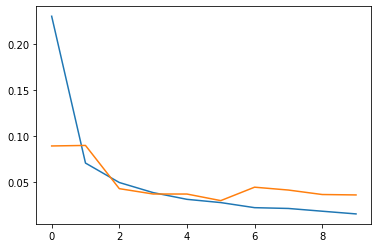

In [41]:
plt.plot(train_losses, label='Train Losses')
plt.plot(test_losses, label='Test Losses')
plt.show()